<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/ML_Algorithms_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def mse(y_true, y_pred):
  return np.mean((y_true-y_pred)**2)

In [26]:
class LinearRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.losses=[]
  def fit(self, x, y):
    n_samples, n_features=x.shape
    self.weights=np.zeros(n_features)
    self.bias=0.0

    for i in range (self.n_iters):
      y_pred = np.dot(x, self.weights)+self.bias
      dw = (2/n_samples)*np.dot(x.T, (y_pred-y))
      db = (2/n_samples)*np.sum(y_pred-y)

      self.weights = self.weights - (self.lr*dw)
      self.bias = self.bias - (self.lr*db)
      loss=mse(y,y_pred)
      self.losses.append(loss)

  def predict(self, x):
    return np.dot(x, self.weights)+self.bias

In [27]:
x = np.array([[1],[2],[3],[4]])
y = np.array([2,4,6,8])

model = LinearRegression(lr=0.01, n_iters=2000)
model.fit(x,y)
pred=model.predict(x)
print("Prediction: ",pred)
loss = model.losses
print("loss:",loss)

Prediction:  [2.0010005  4.00048481 5.99996912 7.99945343]
loss: [30.0, 20.835, 14.475488999999998, 10.06264812435, 7.000561122248114, 4.8757343117726375, 3.401253171852561, 2.378033782977419, 1.6679360217524244, 1.1751073754744565, 0.8330378097960316, 0.5955774152918794, 0.4307037424610951, 0.31619708735646024, 0.23663966378534218, 0.1813333923916355, 0.14285509855526207, 0.11605399478379612, 0.09735605495527408, 0.0842813343232803, 0.07510904808095001, 0.06864517646270595, 0.06406121084126543, 0.06078226305605585, 0.05840942684346795, 0.05666590607587029, 0.055359634286359774, 0.05435733714775996, 0.05356653497546461, 0.05292305464482798, 0.052382364374744125, 0.051913561117189824, 0.05149519853392118, 0.0511123921176561, 0.05075481049679064, 0.050415281644123844, 0.05008882575446269, 0.049771984178735615, 0.04946235378545579, 0.049158263863875624, 0.04885855193380459, 0.04856240818467201, 0.04826926753496674, 0.04797873473445463, 0.04769053239407641, 0.04740446492488251, 0.047120393

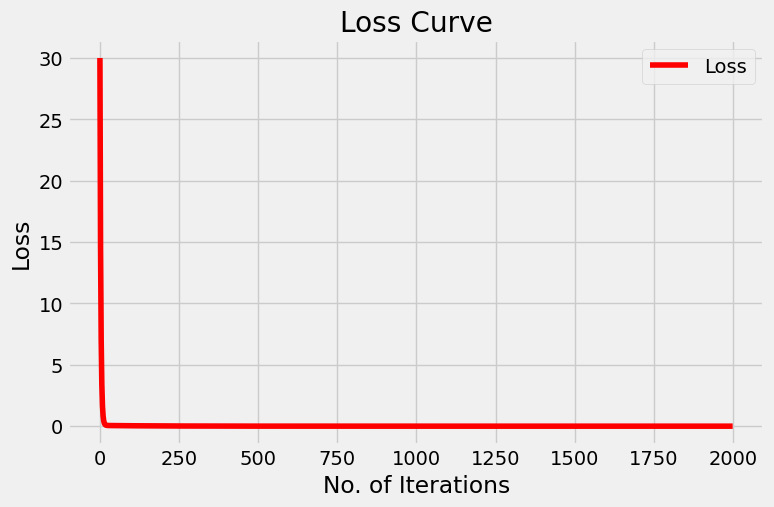

In [28]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,5))
plt.plot(loss, color="red", label="Loss")
plt.xlabel("No. of Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

Logistic Regression

In [29]:
class LogisticRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr=lr
    self.n_iters=n_iters
    self.weights=None
    self.bias=None
    self.losses=[]

  def sigmoid(self, x):
    return 1/ (1+np.exp(-x))

  def compute_loss(self, y_true, y_pred):
    epsilon=1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1-y_true) * np.log(1-y_pred + epsilon)
    return -np.mean(y1+y2)

  def fit(self, X, y):
    n_samples, n_features=X.shape
    self.weights=np.zeros(n_features)
    self.bias=0.0
    for i in range(self.n_iters):
      linear_pred=np.dot(X, self.weights)+self.bias
      y_pred=self.sigmoid(linear_pred)
      loss=self.compute_loss(y, y_pred)
      self.losses.append(loss)

      dw = (1/n_samples)*np.dot(X.T, (y_pred-y))
      db = (1/n_samples)*np.sum(y_pred-y)

      self.weights = self.weights - (self.lr*dw)
      self.bias = self.bias - (self.lr*db)


  def predict(self, X):
    threshold = 0.5
    y_hat = np.dot(X, self.weights) + self.bias
    y_pred = self.sigmoid(y_hat)
    y_pred = [1 if i > threshold else 0 for i in y_pred]
    return np.round(y_pred)

In [30]:
x = np.array([[1,0],[0,1],[0,0],[1,1]])
y = np.array([0,0,0,1])

model = LogisticRegression(lr=0.01, n_iters=2000)
model.fit(x,y)
pred=model.predict(x)
print("Prediction: ",pred)
loss = model.losses
print("loss:",loss)

Prediction:  [0 0 0 1]
loss: [0.6931471785599453, 0.6925229598109888, 0.6919018543512379, 0.6912838388701446, 0.6906688902320886, 0.6900569854752983, 0.6894481018107705, 0.6888422166211946, 0.6882393074598739, 0.6876393520496533, 0.6870423282818446, 0.6864482142151556, 0.6858569880746207, 0.6852686282505337, 0.6846831132973822, 0.6841004219327843, 0.6835205330364287, 0.682943425649016, 0.6823690789712029, 0.6817974723625498, 0.6812285853404696, 0.6806623975791816, 0.6800988889086659, 0.6795380393136229, 0.678979828932435, 0.6784242380561307, 0.6778712471273538, 0.6773208367393347, 0.6767729876348659, 0.6762276807052796, 0.6756848969894315, 0.6751446176726849, 0.6746068240859016, 0.6740714977044349, 0.673538620147127, 0.6730081731753095, 0.6724801386918098, 0.6719544987399593, 0.6714312355026071, 0.6709103313011369, 0.6703917685944892, 0.6698755299781877, 0.6693615981833678, 0.6688499560758117, 0.6683405866549885, 0.6678334730530953, 0.6673285985341065, 0.6668259464928254, 0.66632550045

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

regressor=LogisticRegression(lr=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9298245614035088


Decision Tree - Combination of multiple nested if and else statements

In [32]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    self.feature=feature
    self.threshold=threshold
    self.left=left
    self.right=right
    self.value=value

In [33]:
Node

__main__.Node

In [41]:
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  # Feature index used for splitting
        self.threshold = threshold  # Threshold value for splitting
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Predicted class for leaf nodes

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self.grow_tree(X, y)

    def gini_impurity(self, y):
        if len(y) == 0:
            return 0  # No impurity for an empty dataset
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def information_gain(self, parent, left_child, right_child):
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        return self.gini_impurity(parent) - (
            weight_left * self.gini_impurity(left_child) +
            weight_right * self.gini_impurity(right_child)
        )

    def best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):  # Iterate over all features
            thresholds = np.unique(X[:, feature])  # Unique values for splitting
            for threshold in thresholds:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask
                left_child = y[left_mask]
                right_child = y[right_mask]

                if len(left_child) == 0 or len(right_child) == 0:
                    continue  # Skip invalid splits

                gain = self.information_gain(y, left_child, right_child)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Terminal conditions
        if depth == self.max_depth or n_classes == 1 or n_samples < 2:
            # Return the most frequent class as a leaf value
            if len(y) == 0:  # Handle empty `y`
                return Node(value=None)
            return Node(value=np.argmax(np.bincount(y)))

        # Find the best split
        feature, threshold = self.best_split(X, y)
        if feature is None:  # No valid split found
            return Node(value=np.argmax(np.bincount(y)))

        # Split the data
        left_mask = X[:, feature] < threshold
        right_mask = ~left_mask
        left_child = self.grow_tree(X[left_mask], y[left_mask], depth + 1)
        right_child = self.grow_tree(X[right_mask], y[right_mask], depth + 1)
        return Node(feature, threshold, left=left_child, right=right_child)

    def predict(self, X):
        return np.array([self.traverse_tree(x, self.root) for x in X])

    def traverse_tree(self, x, node):
        if node is None or node.value is not None:  # Leaf node or empty node
            return node.value
        if x[node.feature] < node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)


# Example usage
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 0, 0, 1])

tree = DecisionTree(max_depth=2)
tree.fit(X, y)
predictions = tree.predict(X)
print("Predictions: ", predictions)

accuracy = np.sum(predictions == y) / len(y)
print("Accuracy: ", accuracy)


Predictions:  [0 0 0 1]
Accuracy:  1.0


In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris=load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
print(predictions)

accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy: ", accuracy)

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
Accuracy:  1.0
